<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Contexte-de-l'étude" data-toc-modified-id="Contexte-de-l'étude-1">Contexte de l'étude</a></span></li><li><span><a href="#Préparation-des-bases-de-données" data-toc-modified-id="Préparation-des-bases-de-données-2">Préparation des bases de données</a></span><ul class="toc-item"><li><span><a href="#Importation-des-librairies-et-fonctions-personnalisées" data-toc-modified-id="Importation-des-librairies-et-fonctions-personnalisées-2.1">Importation des librairies et fonctions personnalisées</a></span></li><li><span><a href="#Importation-des-jeux-de-données" data-toc-modified-id="Importation-des-jeux-de-données-2.2">Importation des jeux de données</a></span></li><li><span><a href="#Récapitulatif-des-bases-de-données" data-toc-modified-id="Récapitulatif-des-bases-de-données-2.3">Récapitulatif des bases de données</a></span></li></ul></li><li><span><a href="#Analyses-descriptives" data-toc-modified-id="Analyses-descriptives-3">Analyses descriptives</a></span><ul class="toc-item"><li><span><a href="#Corrélation-de-Pearson" data-toc-modified-id="Corrélation-de-Pearson-3.1">Corrélation de Pearson</a></span></li><li><span><a href="#Analyse-en-composantes-principales-(ACP)" data-toc-modified-id="Analyse-en-composantes-principales-(ACP)-3.2">Analyse en composantes principales (ACP)</a></span></li><li><span><a href="#Partitionner-avec-l'algorithme--k-means" data-toc-modified-id="Partitionner-avec-l'algorithme--k-means-3.3">Partitionner avec l'algorithme  k-means</a></span></li></ul></li><li><span><a href="#Analyses-explicatives" data-toc-modified-id="Analyses-explicatives-4">Analyses explicatives</a></span><ul class="toc-item"><li><span><a href="#une-variable-quantitative-et-une-variable-qualitative-:-ANOVA" data-toc-modified-id="une-variable-quantitative-et-une-variable-qualitative-:-ANOVA-4.1">une variable quantitative et une variable qualitative : ANOVA</a></span></li><li><span><a href="#Deux-variables-qualitatives-:-CHI-2" data-toc-modified-id="Deux-variables-qualitatives-:-CHI-2-4.2">Deux variables qualitatives : CHI-2</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5">Conclusion</a></span></li></ul></div>

# Contexte de l'étude

Ce notebook présente la réalisation d'une première exploration et analyse des données. 

L'analyse est basée sur le jeu de données Open Food Facts.

<div>
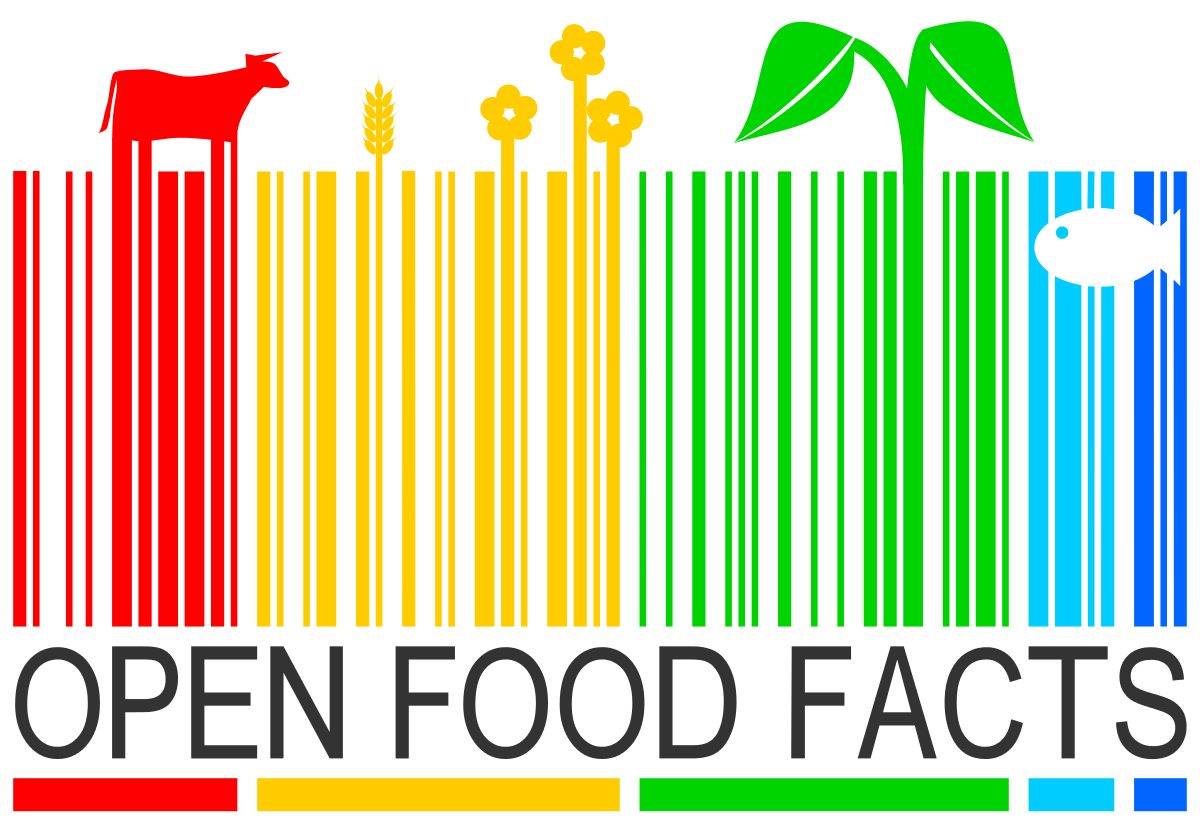
</div>

# Préparation des bases de données

## Importation des librairies et fonctions personnalisées

Les librairies nécessaires pour l'étude sont importées dans l'environnement de travail.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import mes_packages.Optimus_Prime.description as my_desc
import mes_packages.Otis_LeScribe.AnalyseDescriptive as my_ad
import mes_packages.Otis_LeScribe.AnalyseExplicative as my_ae
import mes_packages.Avengers_Assemble.K_Means as my_km

## Importation des jeux de données

In [3]:
import os
from dotenv import load_dotenv  # Pour récupérer les variables d'environnement

load_dotenv('var.env')  # Importation des variables d'environnement

# Récupération des variables d'environnement
chemin = os.environ['CHEMIN']

In [4]:
df_net = pd.read_csv(chemin + "/export_df_net_test.csv", sep='\t', low_memory=False)

## Récapitulatif des bases de données

In [5]:
df_net.head()  #Base de données principale

,code,created_t,product_name,brands_tags,labels_tags,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,...,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,countries,solide_ou_liquide,year,boisson_ou_aliment,score_fruits_vegetables
0,0000000000017,1529059080,Vitória crackers,unknown,Unknown,2.040371e+08,2,0,0,14.0,...,0.560,0.012460,0.077388,0.144409,0.015516,France,Unknown,2018,aliment,0
1,000000000003327986,1574175736,Filetes de pollo empanado,unknown,Unknown,2.040371e+08,2,0,0,9.0,...,0.440,0.012460,0.077388,0.144409,0.015516,Espagne,Unknown,2019,aliment,0
2,000000000004622327,1619501895,Hamburguesas de ternera 100%,unknown,Unknown,2.040371e+08,2,0,0,17.0,...,0.840,0.012460,0.077388,0.144409,0.015516,Espagne,Unknown,2021,aliment,0
3,0000000000100,1444572561,moutarde au moût de raisin,courte-paille,Autre,3.369091e+01,0,0,0,18.0,...,1.840,0.000103,0.005671,0.041014,0.000623,France,Solide,2015,aliment,0
4,0000000000123,1535737982,Sauce Sweety chili 0%,unknown,Unknown,2.040371e+08,2,0,0,-3.0,...,0.816,0.012460,0.077388,0.144409,0.015516,France,Unknown,2018,aliment,0


In [6]:
my_desc.data_informations(df_net)


*Fonction by Sandy M.*

---------------------------INFORMATION SUR LA BASE DE DONNEES-----------------------------------------------
Nombre de variables : 37
Nombre d'observations : 1527078
---------------------------VALEURS MANQUANTES---------------------------------------------------------------
Nombre de cellules avec des données manquantes :  2
Pourcentage du nombre de cellules avec des données manquantes :  0.0  %
Nombre de lignes avec au moins une donnée manquante :  2
Pourcentage de lignes avec au moins une donnée manquante :  0.0  %
---------------------------VALEURS DUPLIQUEES---------------------------------------------------------------
Nombre de doublons dans la base de données :  0
Pourcentage de doublons dans la base de données :  0.0  %
---------------------------VALEURS OUTLIERS-----------------------------------------------------------------
Nombre de cellules avec des outliers :  1853986
Pourcentage du nombre de cellules avec des outliers :  3.3  %
Nombre de lignes avec au moins un outlier :

In [7]:
df_net = df_net.drop(columns=[
    'code',
    'created_t',
    'product_name',
    'brands_tags',
    'ingredients_that_may_be_from_palm_oil_n',
    'energy-kcal_100g',
    'main_category',
    'serving_quantity',
    'solide_ou_liquide',
    'year',
    'boisson_ou_aliment',
    'nova_group',
    'score_fruits_vegetables',
])

# Analyses descriptives

## Corrélation de Pearson

La heatmap ci-dessous donne les coefficients de corrélation de Pearson pour chaque couple de variables quantitatives.
Cette corrélation est linéaire, le coefficient est proche de 1 quand les variables partagent une forte corrélation linéaire.

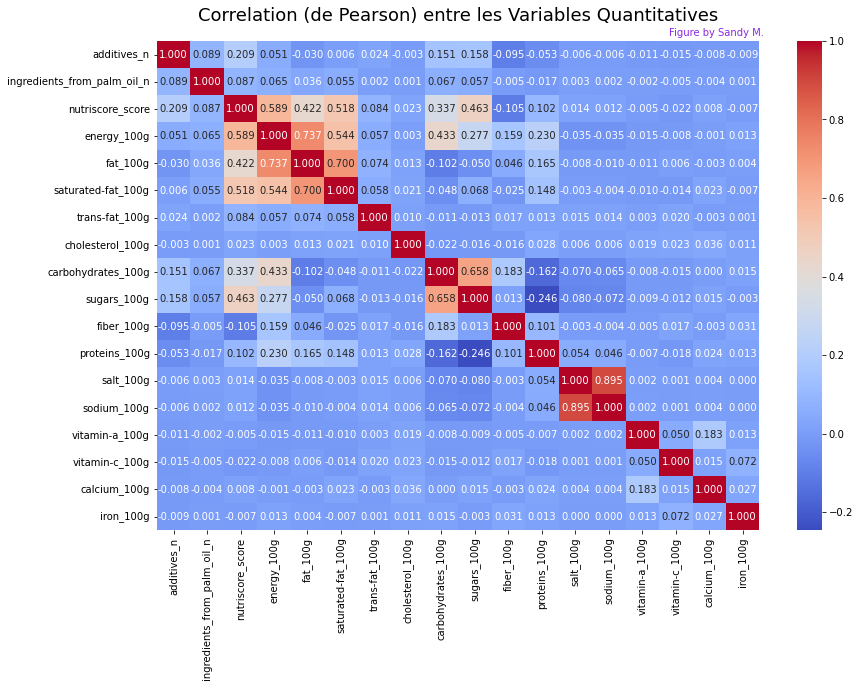

In [8]:
""" Cette fonction affiche une heatmap avec les coefficients de correlation de Pearson entre chaque variable
Entrées : df_net : le dataframe
"""
# Heatmap des corrélation de Pearson
my_ad.correlation_map_corr(df_net)

## Analyse en composantes principales (ACP)

L'analyse en composantes principales (ACP) a deux objectifs principaux :

- étudier la liaison entre les variables
- étudier la variabilité entre individus. La premier objectif consiste à interpréter le cercle des correlations et de calculer les composantes principales.

L'analyse en composantes principales nous permet d'effectuer une réduction de dimension et de déceler des dépendances entre des variables.

In [9]:
print(
    f"La base de données contient {df_net.select_dtypes(exclude=object).shape[1]} variables quantitatives"
)

La base de données contient 18 variables quantitatives


Avant de représenter les cercles de corrélations pour les différents couples d'axes principaux d'inertie, il faut connaître le nombre de composantes principales optimales. 

Pour cela, la fonction maPCA est utilisée pour le nombre total de variables quantitatives de la base de données. 
Pour avoir accès au nombre de composantes principales optimal, il suffit de représenter l'éboulis des valeurs propres. 
Si le ratio d'inertie est inférieur à p/100 (où p est le nombre de variables quantitatives), cela signifie que l'axe principal d'inertie a moins de variabilité que la variable initiale (c'est le critère de Kaiser). 

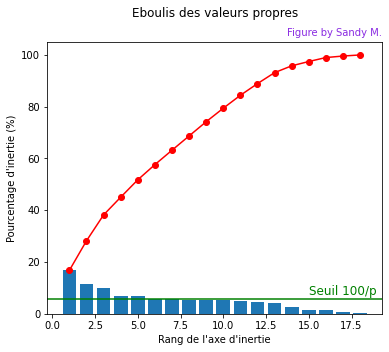

D'après le critère de Kaiser, il y a 7 composantes principales optimales (avec un pourcentage d'inertie supérieur au seuil de 100/p).



*Fonction by Sandy M.*

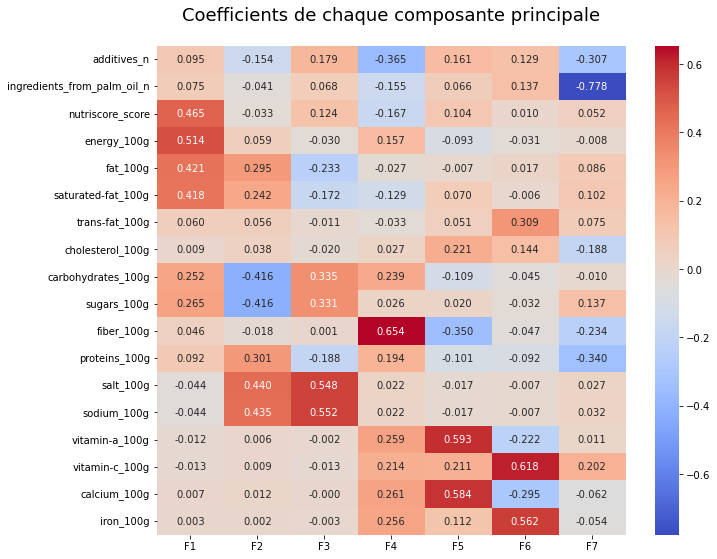

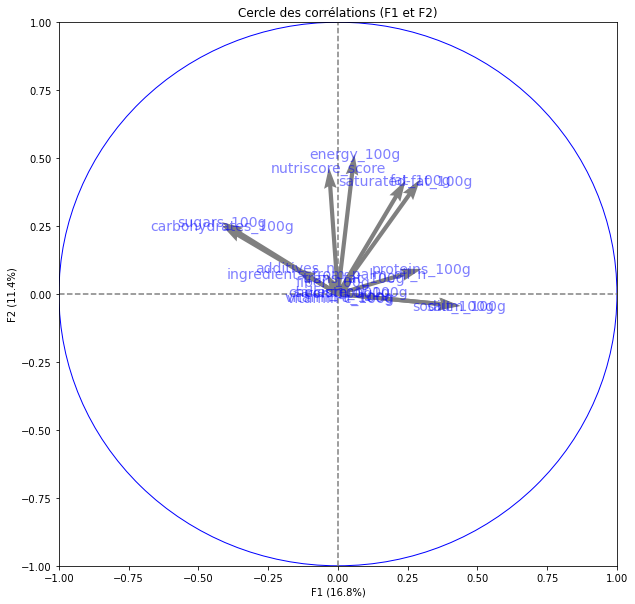

In [10]:
""" Cette fonction effectue une analyse en composantes principales de la base de données.
Entrées : 
- data : le dataframe
- n_comp : le nombre de composantes principales (par défaut = None )
- afficher_eboulis : si "oui", affiche l'éboulis des valeurs propres (par défaut : "non")
- afficher_coefficients : si "oui" affiche le tableau des coefficients des composantes principales (par défaut : non)
- auto_ncomp : calcul automatique du nombre de composantes principales d'après le critère de Kaiser
- nb_cercles = None
"""
# Analyse en composantes principales
my_ad.maPCA(df_net,
      afficher_eboulis="oui", # Affichage des éboulis des valeurs propres, 
      afficher_coefficients='oui', # Affichage d'un tableau avec les coefficients des composantes principales
      auto_ncomp='oui', # établissement automatique du nombre de composantes principales,
      afficher_cercles='oui', # affichage d'un cercle de corrélation
      nb_cercles=1)

La fonction de l'ACP donne également le tableau de valeur selon les nouvelles "variables" que sont les composantes principales.
Grâce à la heatmap il est possible de voir à quels axes principaux d'inertie les variables initiales sont fortement corrélées.


*Fonction by Sandy M.*

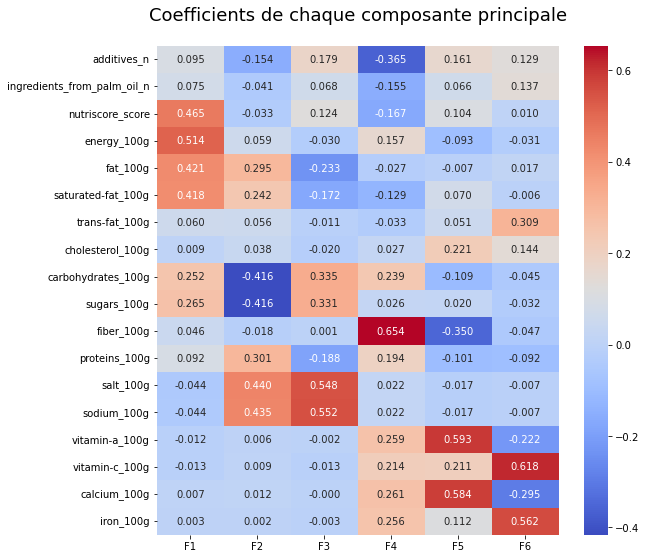

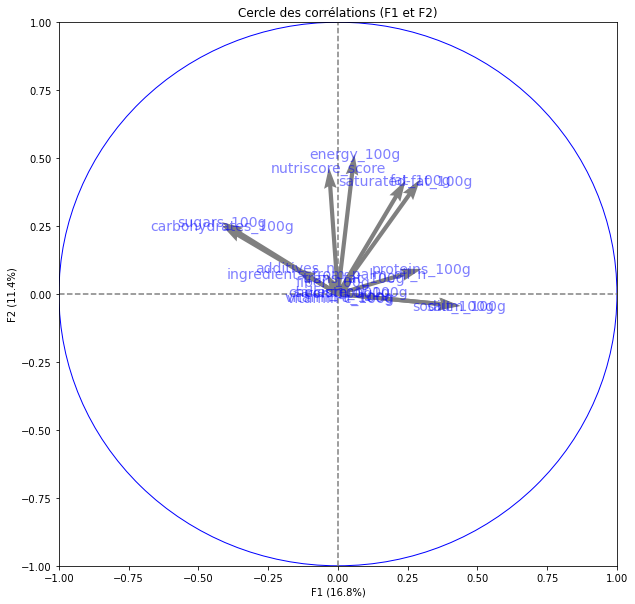

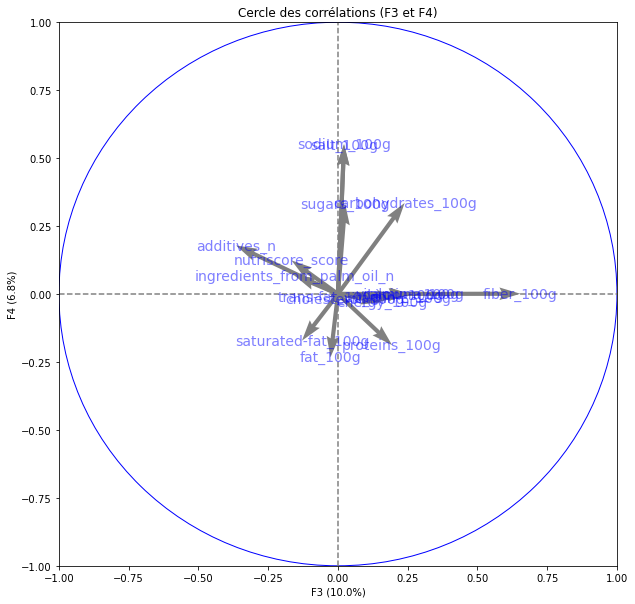

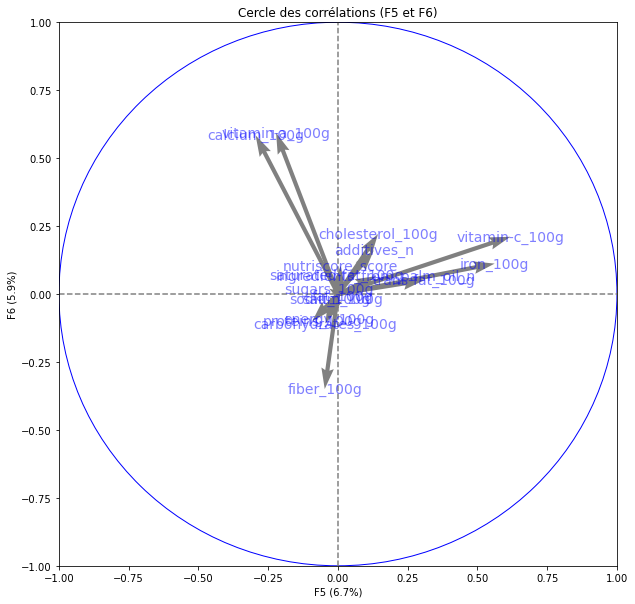

In [11]:
# Analyse en composantes principales (pour une nombre de composantes principales de 6)
my_ad.maPCA(
    df_net, n_comp = 6, afficher_coefficients = 'oui' , afficher_cercles = 'oui')

Les cercles des corrélations permettent de visualiser les corrélations entre les variables et les axes principaux d'inertie. 
Dans le cas de cette étude, l'analyse est une ACP normée, les axes vont donc de la valeur -1 à la valeur 1 et les flèches les plus faciles à interpréter sont celles dont la pointe est proche du cercle des corrélations. 
Par exemple, sur le premier cercle, les deux flèches les plus faciles à interpréter sont celles des variables "nutriscore_score" et "energy_100g". Elles sont toutes les deux proches de l'axe principal d'inertie F1, elles ont donc un mode en commun avec cette composante principale. 

Enfin, il est possible de représenter les produits sur les graphiques avec comme axes les composantes principales. 
Cela permet de voir s'il est possible de dégager des tendances ou des groupes suivant ces nouvelles "variables". Dans le cas de cette étude, par exemple pour la variable nutriscore, il n'est pas évident de voir des groupes se détacher ou des tendances particulières.

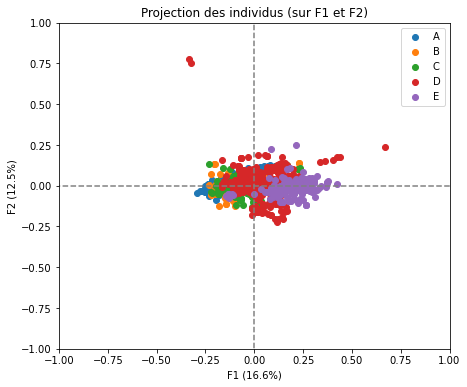

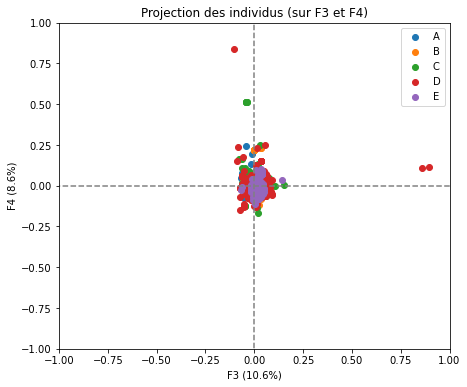

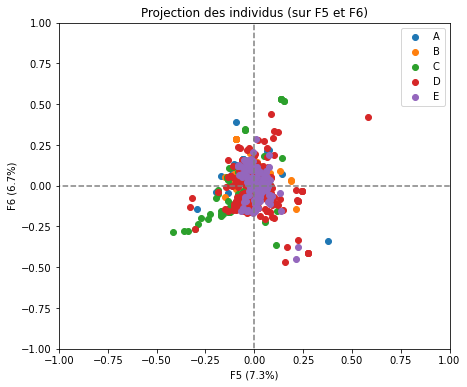

In [12]:
# Analyse en composantes principales
my_ad.maPCA(df_net.head(1000),
      n_comp=6, # 6 composantes principales
      afficher_plan_factoriel='oui', # Représentation de la projection des points sur les plans factoriels
      illustrative_var=df_net['nutriscore_grade'].head(1000)) # nuance de couleur d'après la variable nutriscore_grade

## Partitionner avec l'algorithme  k-means

L'algorithme k-means permet de regrouper les données en un certain nombre de groupes (clusters). Les points de chaque groupe partagent des tendances, des modes en commun. Pour trouver le nombre de groupes optimal, il faut utiliser les coordonnées des points projetés sur les composantes principales déterminées grâce à l'ACP. Pour trouver ce nombre optimal de clusters, la méthode du coude est utilisée.

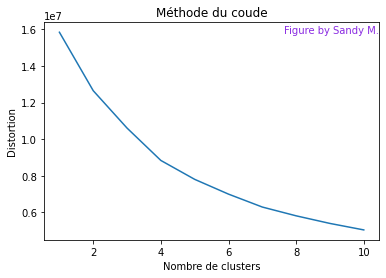

In [13]:
""" Cette fonction affiche la variance en fonction du nombre de clusters
Entrées :
- data : le dataframe,
- intervalle : valeur de K à tester, 
- pca : si 'oui', effectue une pca sur pour les variables quantitatives (par défaut = None), 
- n_comp : nombre de composantes principales, si None, calculée par le critère de Kaiser (par défaut = None).
"""
# Variance pour un nombre de clusters compris entre 1 et 10
my_km.methode_coude(df_net, intervalle = range(1, 11), pca = 'oui', n_comp = 6)

Ici l'algorithme des k-means a été lancé avec plusieurs valeurs de K (nombre de clusters). Le nombre de clusters est représenté en abscisse. Chaque calcul donne K groupes avec un "centroid" pour chaque groupe. La variance est la somme des distances entre le centroid et les points du groupe. Pour trouver le bon nombre de clusters il faut minimiser ces distances (les distances intra-classes). En suivant la méthode du coude, le nombre K choisi est celui à partir duquel la variance (distortion sur le graphique) ne se réduit plus de façon significative.

D'après le critère de Kaiser, il y a 7 composantes principales optimales (avec un pourcentage d'inertie supérieur au seuil de 100/p).


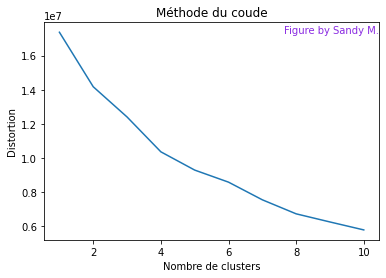

In [14]:
# Variance pour un nombre de clusters compris entre 1 et 10 pour un nombre de composantes principales déterminé par le critère de Kaiser
my_km.methode_coude(df_net, intervalle = range(1, 11), pca = 'oui')

In [15]:
""" Cette fonction donne un vecteur avec le numero du cluster pour chaque point
Entrées :
- n_clust : le nombre de cluster choisi
- data : le dataframe,
- pca : si 'oui', effectue une pca sur pour les variables quantitatives (par défaut = None), 
- n_comp : nombre de composantes principales, si None, calculée par le critère de Kaiser (par défaut = None).

Renvoie :
- vecteur avec le numero du cluster pour chaque point
"""

df_net_clusters = my_km.clusters(n_clust = 6, data = df_net ,pca = 'oui', n_comp = 6)

La segmentation des données est faite grâce aux fonctions Kmeans. Les différents produits de la base de données sont partagés en sous-groupes en fonction de leur projection sur les composantes principales. 

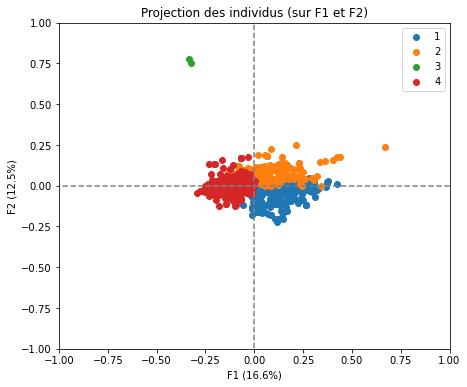

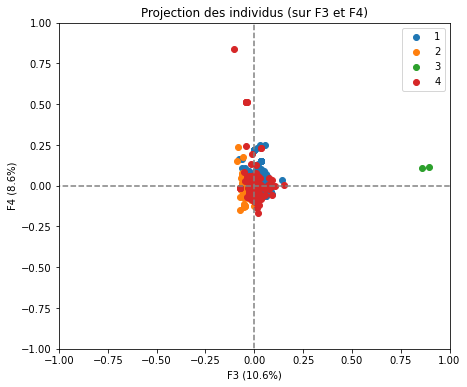

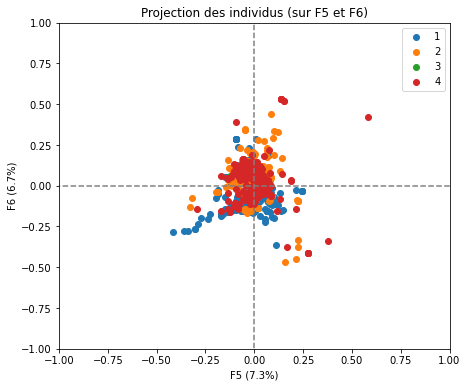

In [16]:
my_ad.maPCA(
    df_net.head(1000), n_comp = 6, afficher_plan_factoriel = 'oui', illustrative_var=df_net_clusters[0:1000])

Contrairement aux représentations précédentes, les groupes sont ici visibles.
Cette association de l'analyse en composantes principales avec l'algorithme de k-means représente une opportunitée pour commencer une classification non supervisée. Cette classification pourra ensuite être utilisée par des algorithmes pour prédire des valeurs de variables telles que les valeurs d'un nutriscore ou pour savoir à quel groupe d'aliments appartient un produit à partir de ces variables quantitatives.

# Analyses explicatives

## une variable quantitative et une variable qualitative : ANOVA

Les tests ANOVA permettent de comparer des variables quantitatives à des variables qualitatives. Une partie des variables est sélectionnée pour ces tests.

In [17]:
columns_quali = [
    'labels_tags', 'nutriscore_grade', 'pnns_groups_1', 'countries'
]
columns_quanti = [
    'nutriscore_score', 'energy_100g', 'fat_100g', 'sugars_100g',
    'fiber_100g', 'proteins_100g', 'salt_100g'
]
df_anova = df_net[columns_quali + columns_quanti]

La corrélation entre des variables quantitatives et des variables qualitatives peut être observée grâce à des représentations de type pairplot.

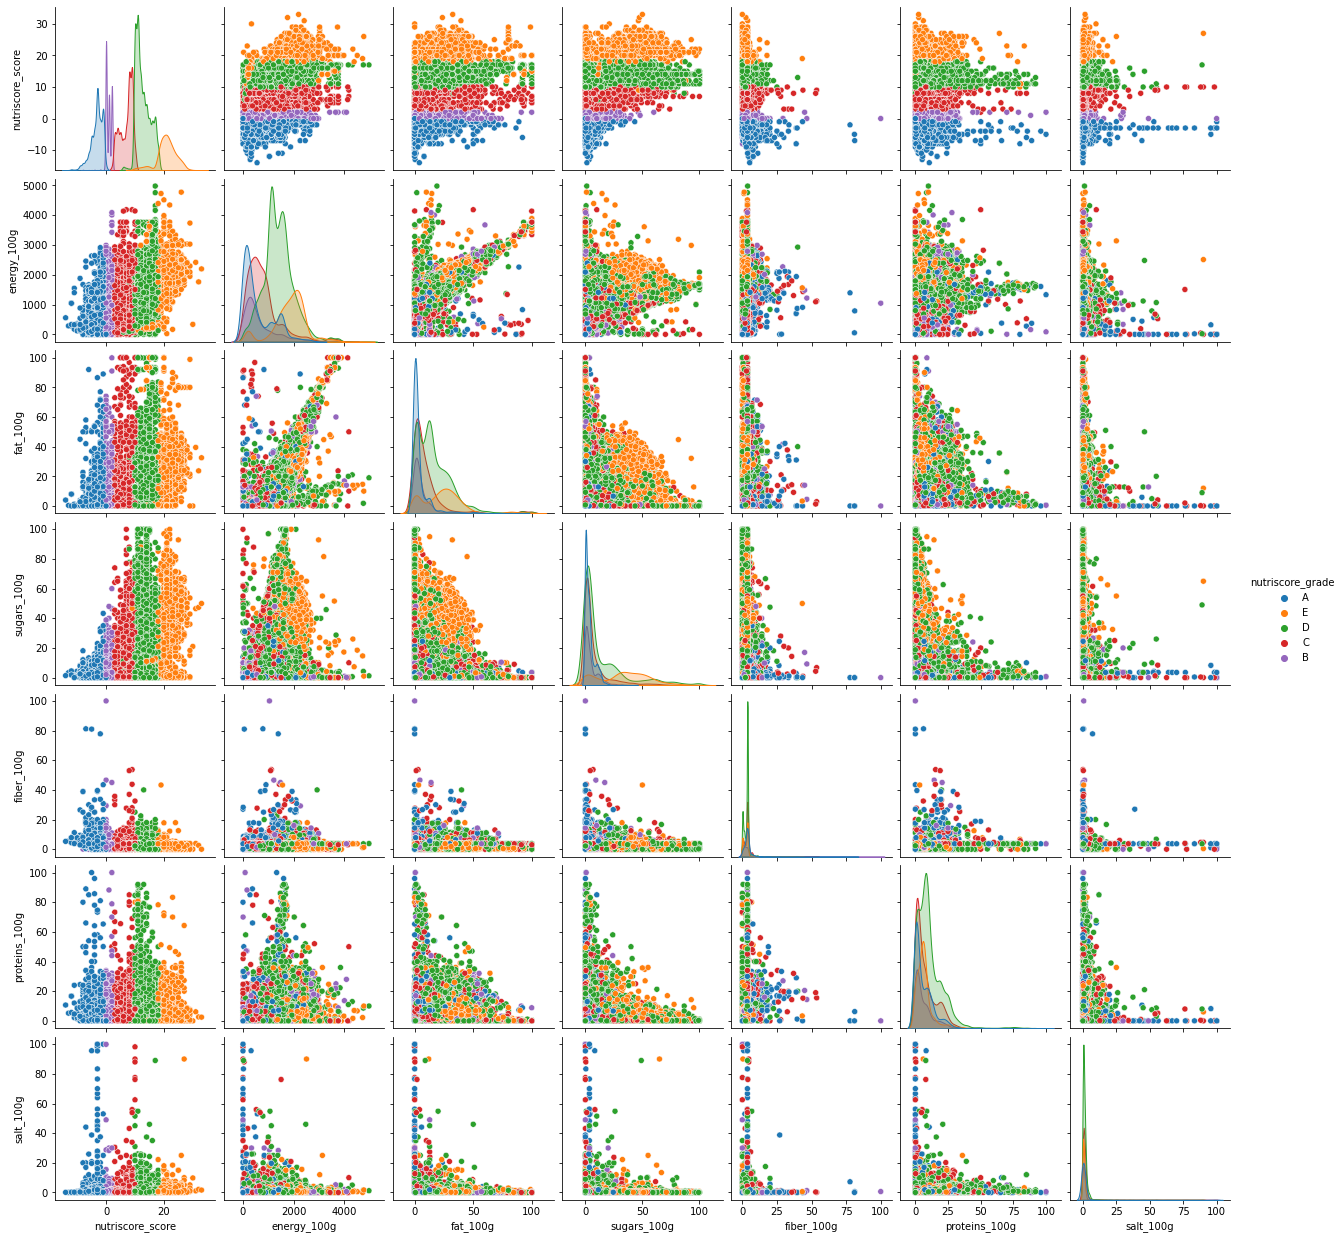

In [18]:
sns.pairplot(df_anova.sample(frac=0.01), hue="nutriscore_grade")
plt.show()

Sur ces représentations, il est possible de voir une répartition des nutriscore_grade en fonction des valeurs de sugars_100g, fat_100g et energy-kcal_100g.

Néanmoins, sur les pairplots des groupes pnns_groups_1 il est difficile de distinguer des tendances. D'une part, parce qu'il y a beaucoup plus de modalités différentes (5 pour nutriscore_grade, 10 pour pnns_groups_1).

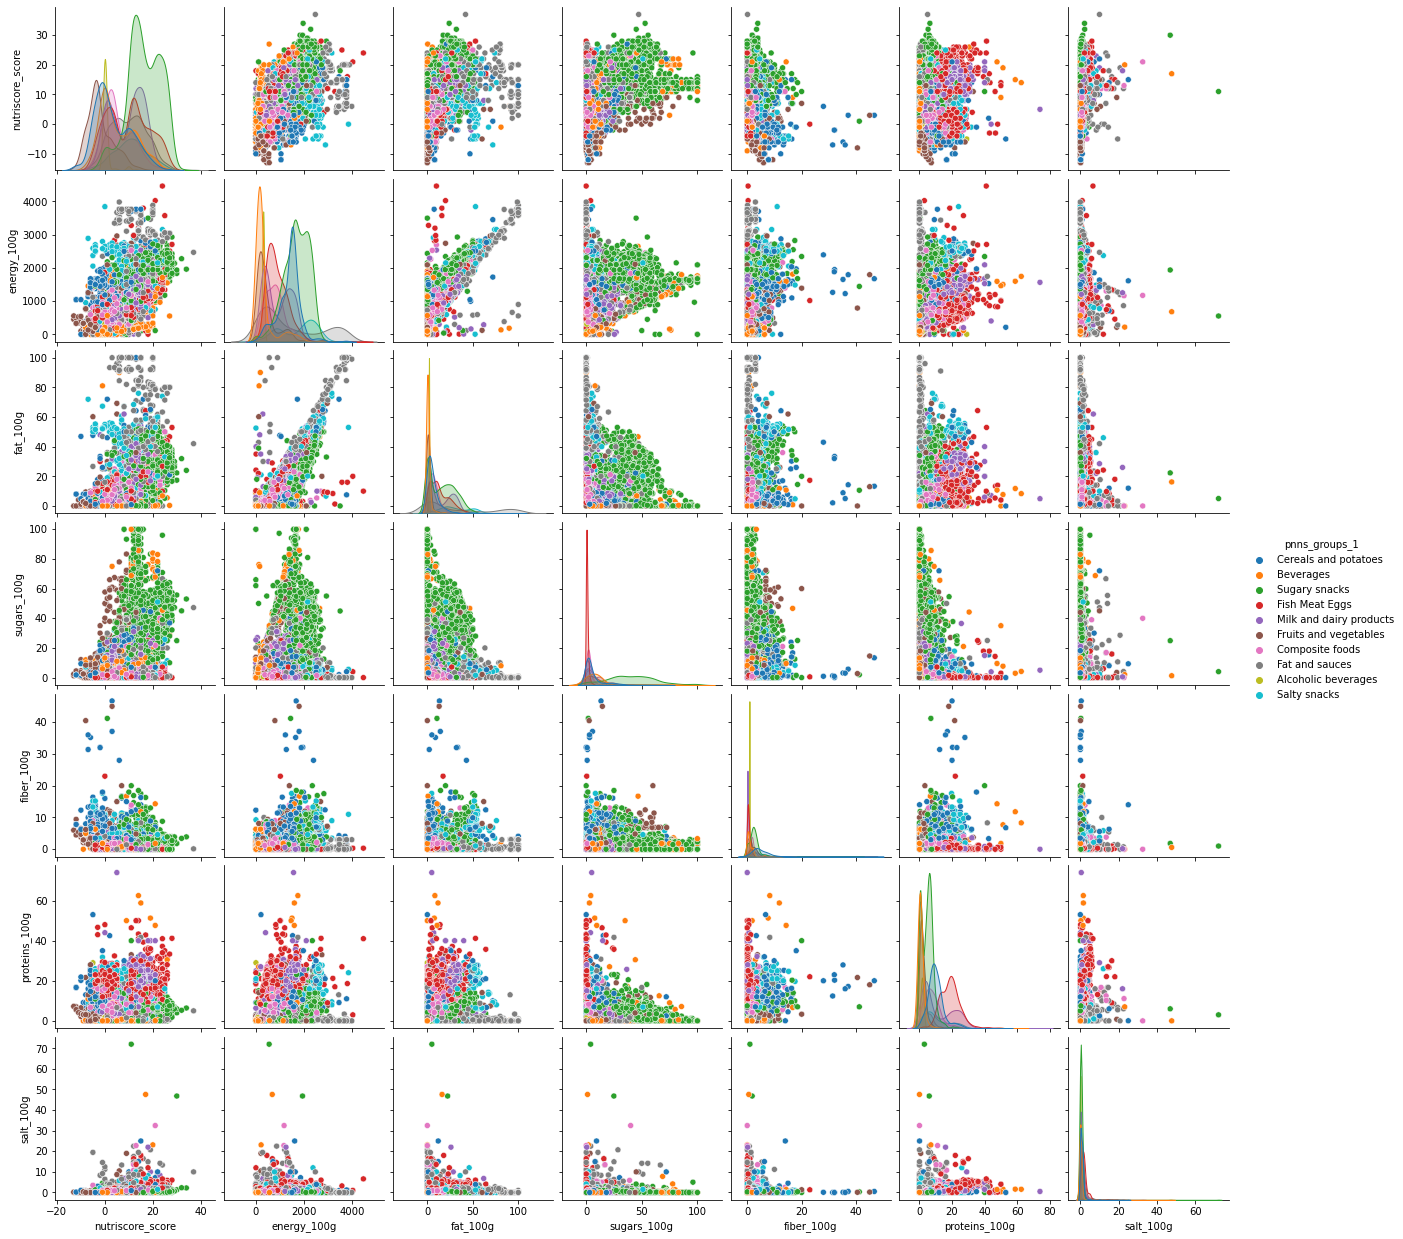

In [19]:
sns.pairplot(df_anova.drop(df_anova[df_anova.pnns_groups_1 == 'unknown'].index).sample(frac=0.01), hue="pnns_groups_1")
plt.show()

Une autre façon de visualiser des corrélations entre les variables qualitatives et les variables quantitatives est de représenter des boxplots des variables quantitatives en fonction des modalités des variables qualitatives.

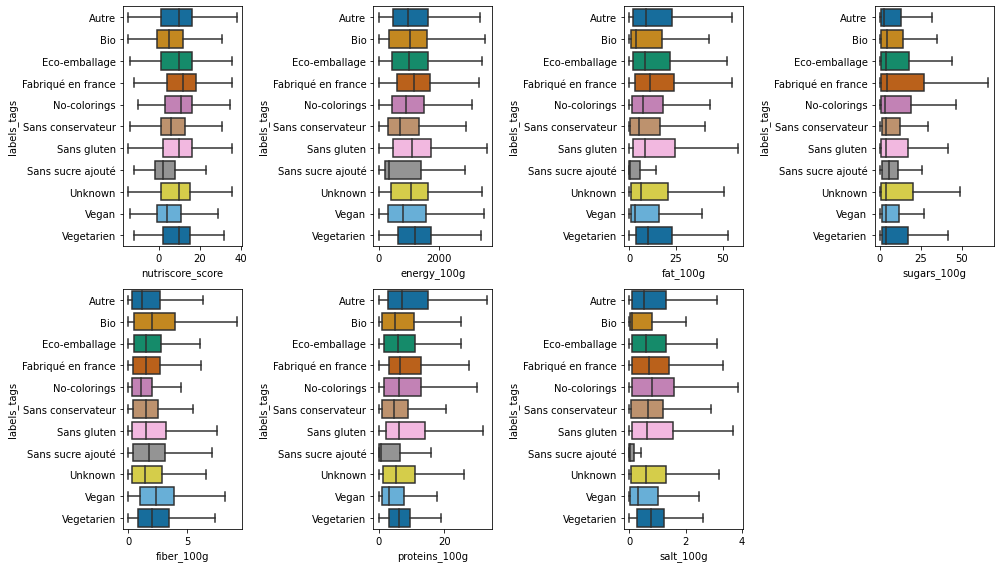

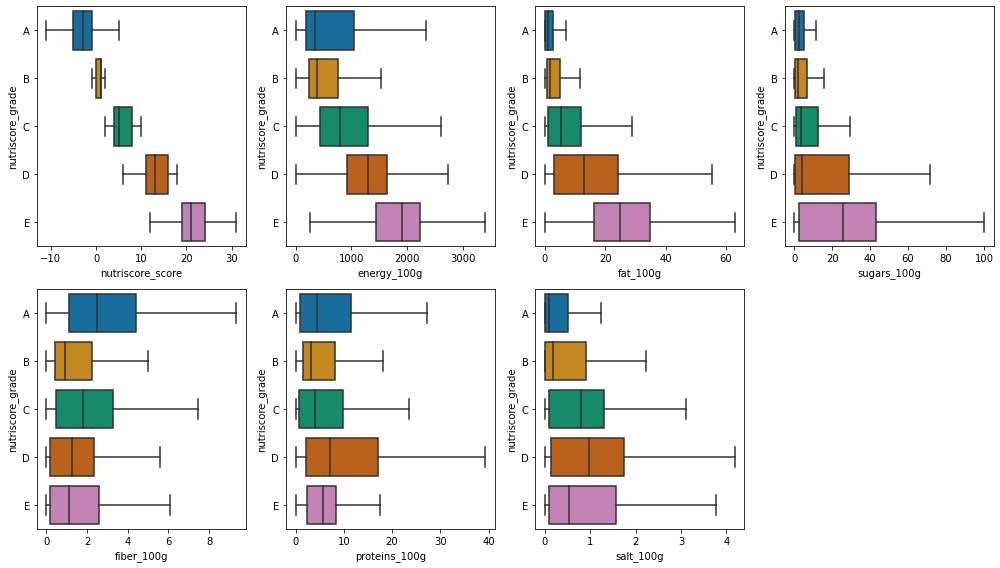

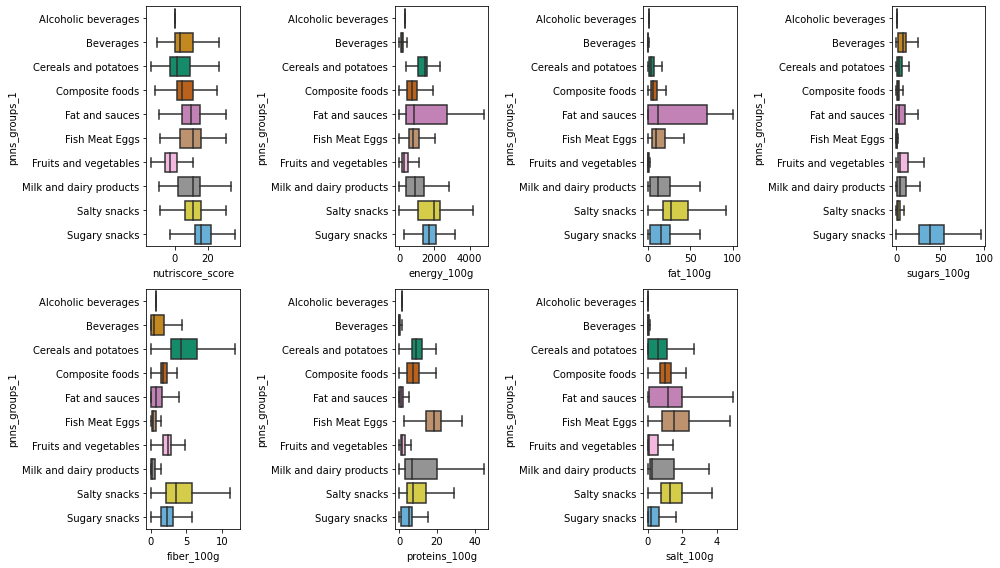

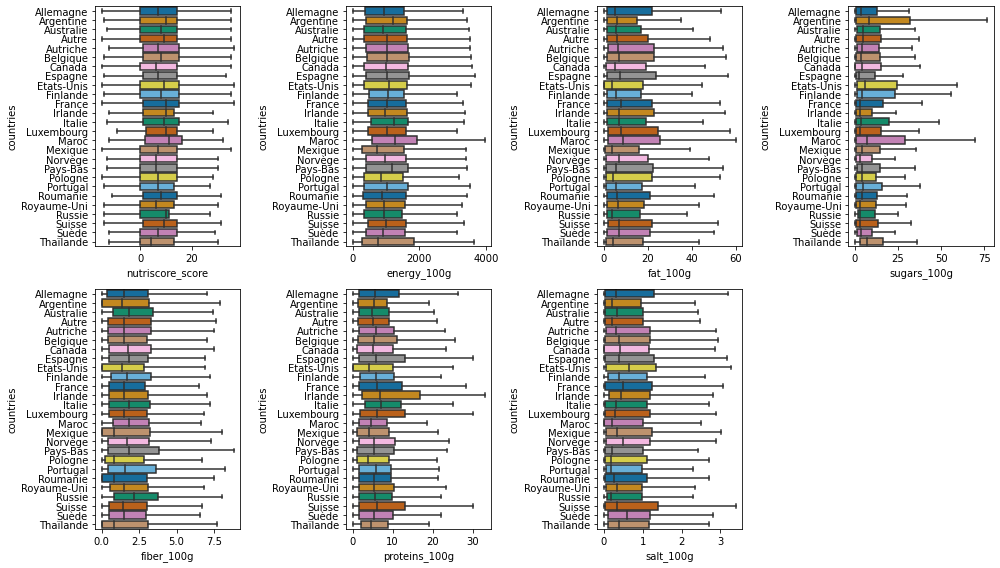

In [20]:
my_ae.moust_aqui(df_anova.drop(df_anova[df_anova.pnns_groups_1 == 'unknown'].index), columns_quali, columns_quanti)

In [21]:
''' Cette fonction affiche un tableau de corrélation  (Variation interclasses / Variation totale) pour chaque couple de variables 
Entrées :
- df = le dataframe
- vars_quali : la liste des variables qualitatives
- vars_quanti : la liste des variables quantitatives'''

# tableau de corrélation  (Variation interclasses / Variation totale)
my_ae.tableau_eta(df_anova.drop(df_anova[df_anova.pnns_groups_1 == 'unknown'].index), columns_quali, columns_quanti)

,nutriscore_score,energy_100g,fat_100g,sugars_100g
labels_tags,0.016,0.003,0.002,0.003
nutriscore_grade,0.905,0.288,0.203,0.158
pnns_groups_1,0.379,0.372,0.258,0.526
countries,0.003,0.002,0.007,0.008


Le tableau ci-dessous représente les rapports de corrélation (Variation interclasses / Variation totale) pour chaque couple de variables.

Plus le rapport de corrélation est proche de 1, plus les variables sont fortement corrélées. Il est possible d'observer que les deux variables qui visuellement avaient l'air fortement corrélées aux variables quantitatives le sont dans ce tableau (nutriscore_grade et pnns_groups_2). Finalement, la variable labels_tags n'est pas aussi influencée que ce qui était attendu. Enfin, le tableau confirme que la variable countries n'est que très faiblement influencée par les variables quantitatives. Néanmoins, ces deux variables sont-elles peu influencées ou sont-elles complètement indépendantes? Les tests ANOVA vont aider à répondre à cette question.

Les deux hypothèses du test ANOVA effectué sur cette étude sont :
- H0 : les distributions suivent la même loi normale. 
- H1 : il existe au moins une distribution dont la moyenne s'écarte des autres moyennes.

Avant de lancer un test ANOVA, il est indispensable de vérifier si les variables quantitatives répondent à une loi normale.

In [22]:
""" Cette fonction renvoie le résultat du test d'hypothèse 'H0 : la variable a une distribution normale'
Entrées : 
data : le dataframe
alpha : le niveau de signification du test
"""
# Tests ANOVA
my_ae.test_anova_data(df_anova, alpha = 5e-2)

________
nutriscore_score
p = 0
H0 est rejetée : nutriscore_score n'est pas de distribution normale
________
energy_100g
p = 0
H0 est rejetée : energy_100g n'est pas de distribution normale
________
fat_100g
p = 0
H0 est rejetée : fat_100g n'est pas de distribution normale
________
sugars_100g
p = 0
H0 est rejetée : sugars_100g n'est pas de distribution normale
________
fiber_100g
p = 0
H0 est rejetée : fiber_100g n'est pas de distribution normale
________
proteins_100g
p = 0
H0 est rejetée : proteins_100g n'est pas de distribution normale
________
salt_100g
p = 0
H0 est rejetée : salt_100g n'est pas de distribution normale


Pour chaque variable quantitative, l'hypothèse de distribution normale est rejétée. Les résultats des tests ANOVA seront donc à prendre avec précautions.

In [23]:
''' Cette fonction renvoie une table Anova avec un modèle linéaire ols (moindres carrés ordinaires) .
Entrées :
var : variables
df : le dataframe
'''
# Table ANOVA nutriscore_score / pnns_groups_1
my_ae.table_anova('nutriscore_score ~ C(pnns_groups_1)', df_anova)

,sum_sq,df,F,PR(>F)
C(pnns_groups_1),1.951734e+07,10.0,38051.353704,0.0
Residual,7.832649e+07,1527067.0,NaN,NaN


In [24]:
# Table ANOVA nutriscore_score / labels_tags
my_ae.table_anova('nutriscore_score ~ C(labels_tags)', df_anova)

,sum_sq,df,F,PR(>F)
C(labels_tags),7.464292e+05,10.0,1173.921621,0.0
Residual,9.709741e+07,1527067.0,NaN,NaN


Les tests d'indépendance (test de Fisher) de chacune des variables qualitatives donnent une p-value inférieure à 0.05 (niveau de test = 5%). L'hypothèse H0 selon laquelle les distributions par modalité présentent une similarité est rejetée. Cela signifie qu'il y a une dépendance entre les variables quantitatives et les variables qualitatives.

## Deux variables qualitatives : CHI-2

Le test du CHI-2 (ou KHI-2) est utilisé ici pour avoir une idée de la dépendance des variables qualitatives. Dans cette partie, seule la corrélation entre le nutriscore et les autres variables qualitatives sera étudiée.

In [25]:
columns_quali = [
    'labels_tags', 'nutriscore_grade', 'pnns_groups_1', 'countries'
]
df_chi_2 = df_net[columns_quali].copy(deep = True)
df_chi_2.pnns_groups_1 = df_chi_2.pnns_groups_1.str.capitalize()

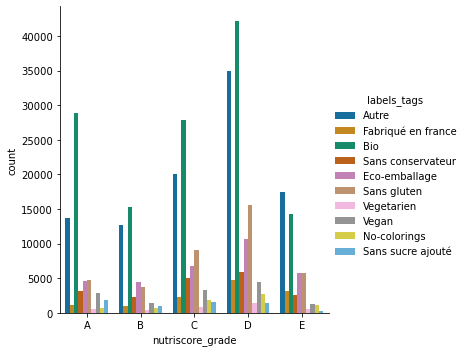

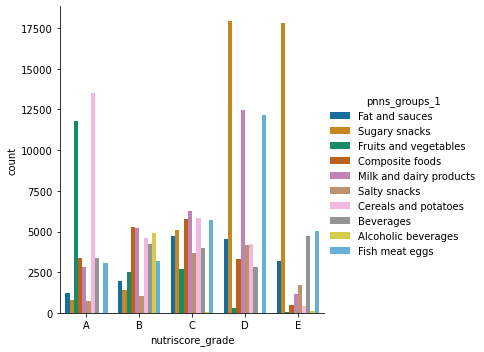

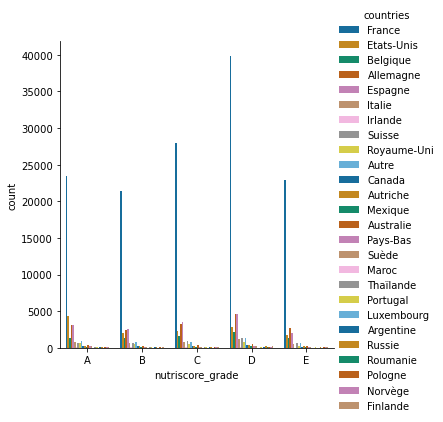

In [26]:
""" Cette fonction affiche un histogramme verticale pour chaque variable qualitative.
Elle sépare les populations selon leur modalité pour une variable qualitative donnée.
Entrées :
data : le dataframe
colonne : la variable qualitative selon laquelle effectuer une séparation de modalités
order : l'ordre d'affichage sur l'axe des abscisses"""

# Histogramme verticaux avec distinction des modalités selon nutriscore_grade
my_ae.visu_chi2(df_chi_2.replace('Unknown', np.nan), 'nutriscore_grade', order = ['A', 'B', 'C', 'D', 'E'])

D'abord, un tableau de contingence est affiché pour chacune des variables. Il s'agit tu tableau où apparaissent les $n_{ij}$.

In [27]:
""" Cette fonction affiche un tableau de contigence pour chaque variable qualitative et une variable qualitative donnée.
Entrées :
data : le dataframe
colonne : la variable qualitative donnée."""

# Tableau de contingence de la variable nutriscore_grade et des autres variables qualitatives
my_ae.tableau_contingence_XY(df_chi_2, 'nutriscore_grade')

labels_tags,Autre,Bio,Eco-emballage,Fabriqué en france,No-colorings,Sans conservateur,Sans gluten,Sans sucre ajouté,Unknown,Vegan,Vegetarien
nutriscore_grade,,,,,,,,,,,
A,13708,28924,4570,1142,668,3198,4815,1832,197370,2881,541
B,12718,15365,4510,1031,772,2363,3803,984,102374,1465,460
C,20033,27802,6813,2316,1844,5001,9130,1590,248186,3309,886
D,34929,42156,10657,4755,2748,5876,15618,1486,451934,4512,1412
E,17418,14252,5748,3122,1095,2545,5804,332,166544,1222,509


pnns_groups_1,Alcoholic beverages,Beverages,Cereals and potatoes,Composite foods,Fat and sauces,Fish meat eggs,Fruits and vegetables,Milk and dairy products,Salty snacks,Sugary snacks,Unknown
nutriscore_grade,,,,,,,,,,,
A,78,15196,32141,6910,4071,10057,34475,8198,2060,1968,144495
B,12588,12622,13304,13100,8554,10145,5668,13023,2867,3756,50218
C,315,9451,17134,17888,19465,14669,7256,15319,9279,13811,202323
D,89,7241,13304,12796,18074,35302,1096,39058,12162,64469,372492
E,469,16729,2069,1559,12391,14671,114,4346,4731,57555,103957


countries,Allemagne,Argentine,Australie,Autre,Autriche,Belgique,Canada,Espagne,Etats-Unis,Finlande,...,Norvège,Pays-Bas,Pologne,Portugal,Roumanie,Royaume-Uni,Russie,Suisse,Suède,Thaïlande
nutriscore_grade,,,,,,,,,,,,,,,,,,,,,
A,11422,382,1833,7047,755,8611,7659,22880,71915,385,...,276,725,592,495,286,5416,447,7350,524,423
B,6999,295,915,3884,610,4474,2309,13322,37475,280,...,191,370,615,297,252,2565,267,3190,407,376
C,17209,368,2721,7646,1239,12825,6386,38626,58045,475,...,441,1045,906,658,331,9016,587,9407,685,480
D,24748,1320,5191,18198,1972,18902,11252,64224,107972,675,...,779,2171,1384,1220,788,14152,1057,15944,1101,673
E,8986,244,1278,4579,780,6923,2667,16361,49915,282,...,184,457,510,294,304,3612,167,5001,390,344


In [28]:
""" Cette fonction permet de faire un test du CHI-2 entre une variable qualitative donnée et les autres variables qualitatives.
Entrées :
data : le dataframe
colonne : la variable qualitative donnée."""

# Test du CHI-2 entre la variable nutriscore_grade et les autres variables qualitatives
my_ae.test_chi_2_XY(df_chi_2, 'nutriscore_grade')

La p-value pour le test du CHI-2 entre la variable  nutriscore_grade et la variable  labels_tags est  0.0
H0 rejetée : les variables  nutriscore_grade et  labels_tags  ne sont pas indépendantes
La p-value pour le test du CHI-2 entre la variable  nutriscore_grade et la variable  pnns_groups_1 est  0.0
H0 rejetée : les variables  nutriscore_grade et  pnns_groups_1  ne sont pas indépendantes
La p-value pour le test du CHI-2 entre la variable  nutriscore_grade et la variable  countries est  0.0
H0 rejetée : les variables  nutriscore_grade et  countries  ne sont pas indépendantes


Il est possible d'afficher une heatmap qui traduit le rapport entre les tableaux des $n_{ij}$ (données observées) et les tableaux des $f_{i}$ x $n_{j}$ (données théoriques attendues). La couleur la plus claire représente un couple de modalités dont le rapport entre la mesure statistique locale et la mesure statistique globale est proche de 1. Les couples de modalités en foncé sont ceux qui ont un écart entre leur mesure et leur valeur d'indépendance élevé.

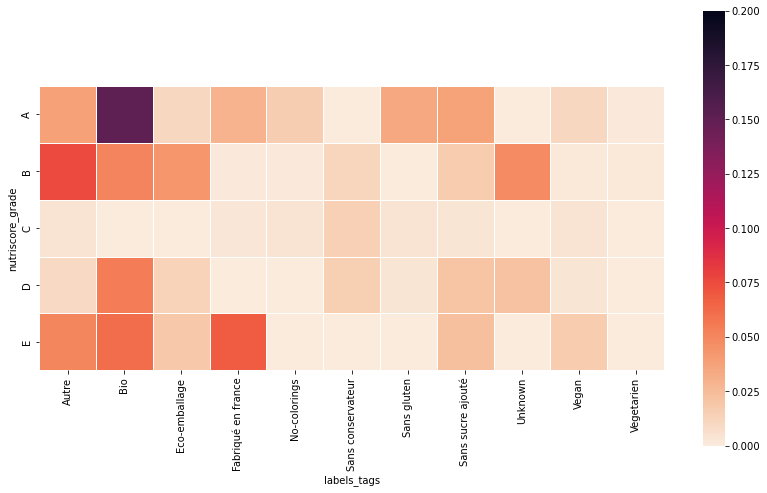

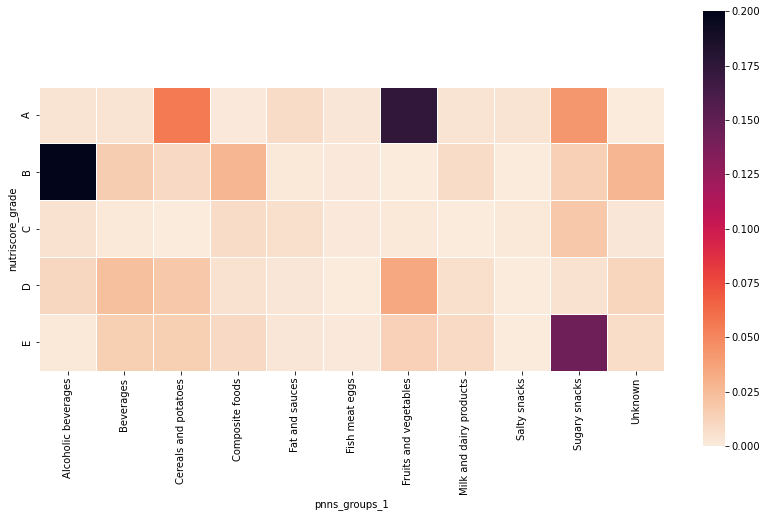

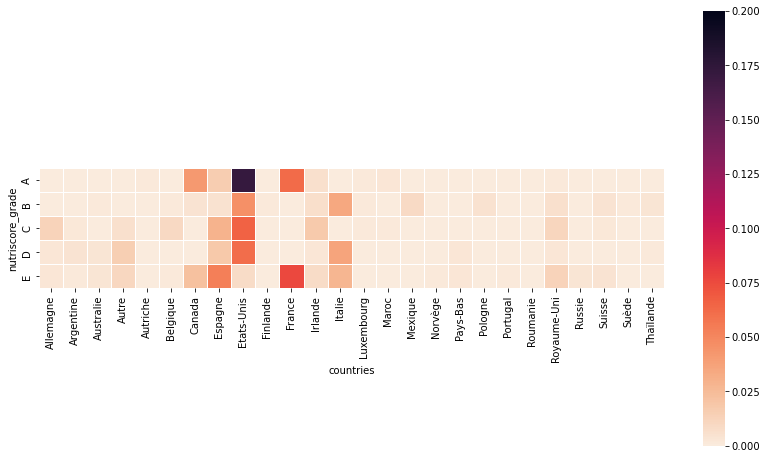

In [29]:
""" Cette fonction affiche une heatmap de la distance entre les données observées et les données théoriques attendues 
Entrées :
df : le dataframe
X : la première variable qualitative
Y : la deuxième veriable qualitative"""

columns = df_chi_2.columns.values.tolist()
columns.remove('nutriscore_grade')
for column in columns:
    my_ae.tableau_chi_2_color(df_chi_2, 'nutriscore_grade', column)

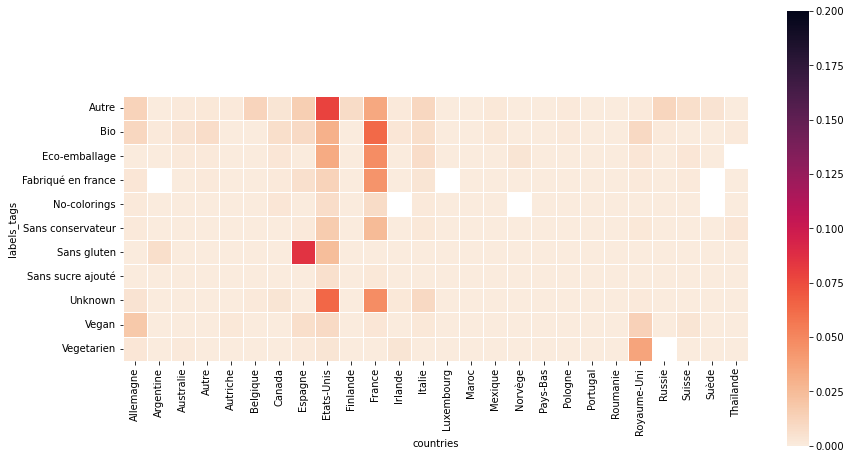

In [30]:
my_ae.tableau_chi_2_color(df_chi_2, 'labels_tags', 'countries')

Les différentes heatmap corroborent bien la dépendance entre les variables qualitatives (qui était déjà établie avec le test du CHI-2)

# Conclusion

L'étude présentée dans ce notebook a permis de répondre à plusieurs objectifs.

La base de données a été nettoyée pour ne garder que les variables les plus pertinentes. Elle a été débarrassée de ses doublons, des produits impossibles à identifier et des lignes complètement vides. Les valeurs impossibles des variables quantitatives ont été supprimées. Pour finir, les valeurs manquantes ont ensuite été imputées grâce aux données statistiques des différentes variables.

Les variables ont d’abord été visualisées une par une avec une représentation adéquate quant à leur distribution. Les visualisations interactives ont permis par la suite de présenter de plus en plus de variables sur un même support. De ces représentations, sont venues les premières hypothèses de corrélations entre les variables.

Ces hypothèses ont été validées en partie par la détermination de la corrélation de Pearson entre les variables quantitatives.

L’analyse descriptive par ACP (Analyse en Composantes Principales) a révélé que la base de données pouvait être résumée grâce à 6 axes principaux d’inertie. Malheureusement, la projection des produits sur ces axes n’a pas permis de révéler des groupes distinctifs.

Pour remédier à cela, une méthode de classification par k-means a été réalisée et 6 sous-groupes ont pu être identifiés. Cette fois, la projection des produits sur les composantes principales a montré la distinction entre les groupes.

Enfin, deux analyses explicatives ont révélé la corrélation entre les différentes variables. D’abord le test ANOVA a montré la corrélation entre les variables quantitatives et les variables qualitatives. Ensuite, le test du CHI-2 a montré la dépendance entre les variables qualitatives. La variable nutriscore se trouvant très fortement influencée par les groupes de produits.